# GT-MSA-S25-Trilemma-Team-14 BTC EDA

*Georgia Tech Summer 2025 MSA Practicum Project*  
*Exploratory Data Analysis*

## 1. Executive Summary

- **Price as the Ultimate Signal:**  Bitcoin’s price encapsulates every market force sentiment, liquidity flows, miner economics and institutional moves.  Log-price Z-scores quantify how far price has deviated from its own history, revealing statistically extreme dips (Z ≤ –2σ) and peaks (Z ≥ +2σ) without relying on fragile secondary metrics.

- **Multi-Window Z-Scores Highlight Cycles:**  Rolling Z-scores over 30, 90, 180, 365 and 1461 days simultaneously capture short-term anomalies, intermediate trends and the phase of the 4-year halving cycle providing a unified framework for tactical and strategic timing.

- **Cycle-Aware Baseline Allocation Shapes:**  Aligning the annual budget shape front-loaded, uniform or back-loaded to the long-term Z-score on January 1 can swing accumulation efficiency (SPD percentile).

- **Dynamic Modulation with Budget Integrity:**  Tactical signals adjust daily purchases above or below the baseline, and any deviation triggers proportional rescaling of the remaining days’ allocations to preserve the total yearly budget.

- **Key Finding:**  Despite several on-chain and miner metrics, **log-price Z-scores** emerged as the most interpretable, resilient and future-proof signals for building a cycle-aware dynamic DCA strategy.

---


## 2. Strategy Rationale & Key Signals

### 2.1 Motivation: A Smarter Way to Dollar-Cost Average  
Bitcoin’s volatility can turn a simple DCA into a missed opportunity or a painful mistake. Plain-vanilla DCA pours equal capital into every day, even when prices soar or crash. A smarter approach senses when to deploy extra capital during rare dips and when to hold back in overheated markets, improving long-term accumulation without increasing overall risk.

### 2.2 The Universe of Metrics: Too Much Noise  
Hundreds of raw features from active addresses and miner revenues to MVRV ratios and supply distributions tell many stories about the market. Early exploration confirmed that these signals can lag, contradict one another, or vanish as the market matures and bots arbitrage away inefficiencies. Without a clear anchor, even sophisticated metrics risk becoming distractions.

### 2.3 Price as the Storyteller  
All market forces sentiment swings, institutional flows, mining economics, regulatory shocks ultimately resolve into price. Log-price Z-scores translate this final product into a statistical language that highlights when the market is abnormally cheap or expensive. Multi-window analysis (30d to 1 461d) reveals tactical dips, medium-term trends, and the phase of Bitcoin’s four-year halving cycle in one unified framework.

### 2.4 Crafting the Baseline: Cycle-Aware Allocation  
At the start of each calendar year, the long-term Z-score defines the market phase - deep undervaluation, neutral, or euphoria. This phase dictates the baseline budget shape:  
- **Front-Loaded** when price is low, seizing early-cycle value  
- **Uniform** in balanced or uncertain conditions  
- **Back-Loaded** in overheated markets, preserving firepower  

This cycle-aware baseline sets the strategic posture for the year, aligning overall risk and reward.

### 2.5 Breathing Life into the Plan: Dynamic Modulation  
Baseline allocation is only the foundation. Daily log-price Z-scores then modulate buys around that plan:  
- **Above Baseline** when deep dips beckon
- **Below Baseline** when peaks and plateaus warn of overexposure  

Every time allocation deviates, the remaining days’ weights are rescaled so the total annual budget stays intact. This two-step narrative **cycle-aware baseline** followed by **signal-driven modulation** creates a living strategy that adapts in real time while preserving the discipline of a fixed yearly budget.

---


## 3. Data Retrieval

The core dataset is sourced from Coin Metrics’ public Bitcoin CSV and then narrowed to the period **January 1, 2013 → December 31, 2024** to capture multiple full market cycles.

- **Analysis window:** 2013–2024  
- **Rows in window:** 4 383 daily observations  
- **Columns:** 147 raw features, including price, returns, network activity, mining metrics, valuation ratios, supply distributions, and more  
- **Price completeness:** `PriceUSD` has no gaps; every other key feature exceeds 95 % coverage (only a few reference-rate fields are entirely empty)

_All loading, parsing, and initial cleaning steps live in the companion technical notebook ([supplementary_technical.ipynb](supplementary_technical.ipynb))._

---

## 4. General Overview

A concise survey of the **2013–2024** subset confirms it is well-suited for extracting price-based signals:

### 4.1 Dataset Shape & Key Statistics
- **Rows & Columns:** 4 383 daily observations × 147 features  
- **Coverage:**  
  - `PriceUSD` complete (0 % missing)  
  - On-chain and mining metrics > 95 % populated  
- **Selected Feature Ranges:**  
  - **PriceUSD:** \$13.28 → \$106 115.91 (mean ≈ \$16 841, median ≈ \$7 359)  
  - **AdrActCnt:** 38 733 → 1 366 494 addresses/day (mean ≈ 645 146, median ≈ 702 675)  
  - **HashRate:** 17.93 → 889 846 000 H/s (mean ≈ 1.34×10⁸, median ≈ 4.62×10⁷)  
  - **CapMrktCurUSD:** \$1.41×10⁸ → \$2.10×10¹² (mean ≈ \$3.20×10¹¹, median ≈ \$1.30×10¹¹)


### 4.2 Initial Visual Inspection

#### Price Over Time  
Shows three distinct bull runs (2013, 2017, 2021, 2024) with increasingly large peaks and intervening bear markets.  
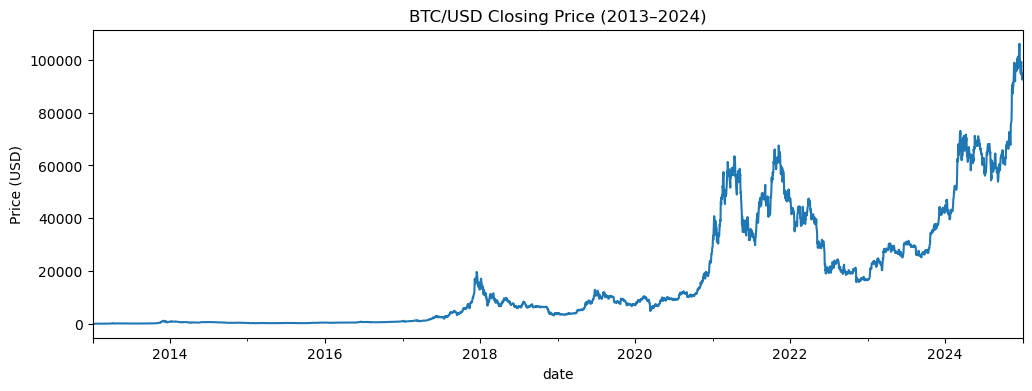

#### Daily Returns Distribution  
Reveals heavy tails and skew extreme one-day moves are far more common than in traditional assets.  
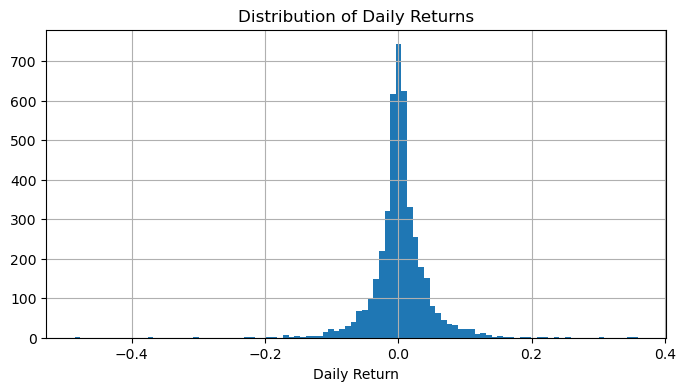

#### 30-Day Realised Volatility  
Highlights volatility clustering: spikes around major tops and bottoms, with calmer phases in between.  
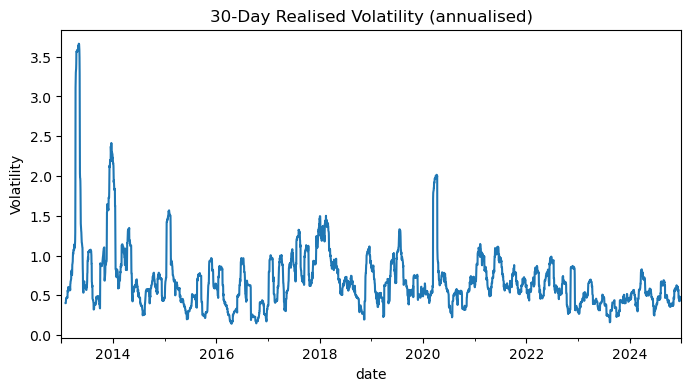


These charts confirm that Bitcoin’s price dynamics and volatility patterns are complete and pronounced ideal for informing a dynamic, signal-driven DCA strategy.

*For full integrity checks, missing-value analyses, descriptive statistics on all features, and the plotting code, see section 1 in the companion technical notebook ([supplementary_technical.ipynb](supplementary_technical.ipynb)).*  

---

## 5. Features Exploration

Multiple metrics were analyzed spanning on-chain activity, network health and valuation indicators, but log-price Z-scores proved the most robust and reliable:

- **On-Chain Activity:** Metrics like active-address counts and transaction volume carry high noise, generate frequent false positives and often lag or contradict price action.  
- **Network Health:** Hash-rate and Difficulty-based Z-scores are inherently delayed by protocol retargets and miner hardware cycles, making them confirmatory rather than predictive for daily timing.  
- **Valuation Metrics:** MVRV Z-scores suffer from stale-coin bias and persistent extremes after price reversals, delivering late signals and adding little distinct edge beyond what price history already shows.

*For a detailed, feature-by-feature exploration including each metric’s strengths, weaknesses, and why they contribute little beyond log-price Z-scores see section 2 in the companion technical notebook ([supplementary_technical.ipynb](supplementary_technical.ipynb)).*




### 5.1 Multi-Window Log-Price Z-Scores

To effectively normalize Bitcoin's price dynamics over its volatile history, we utilize Z-Scores calculated on the **logarithm of the daily Bitcoin price**. This method accounts for exponential growth and allows for more comparable measures of statistical deviation across different market cycles. These Log-Price Z-Scores serve as a foundational input for our dynamic allocation model.

The Z-Score is calculated as:
$$Z_{\text{log}} = \frac{\text{Current Log(Price)} - \text{Rolling Mean of Log(Price)}}{\text{Rolling Standard Deviation of Log(Price)}}$$

**Why this feature?**  
- Translates price history into a normalized statistical signal, highlighting when price deviates strongly from its own recent norms.  
- Short windows (30d, 90d) flag tactical oversold/overbought extremes.  
- Longer windows (180d, 365d) reveal sustained trend environments.  
- The 1461-day window maps directly to Bitcoin’s 4-year halving cycle, identifying early-cycle accumulation, middle-cycle normality, and late-cycle euphoria.

#### Visual Analysis  
- **Cycle 1 (2013–2016)**  
  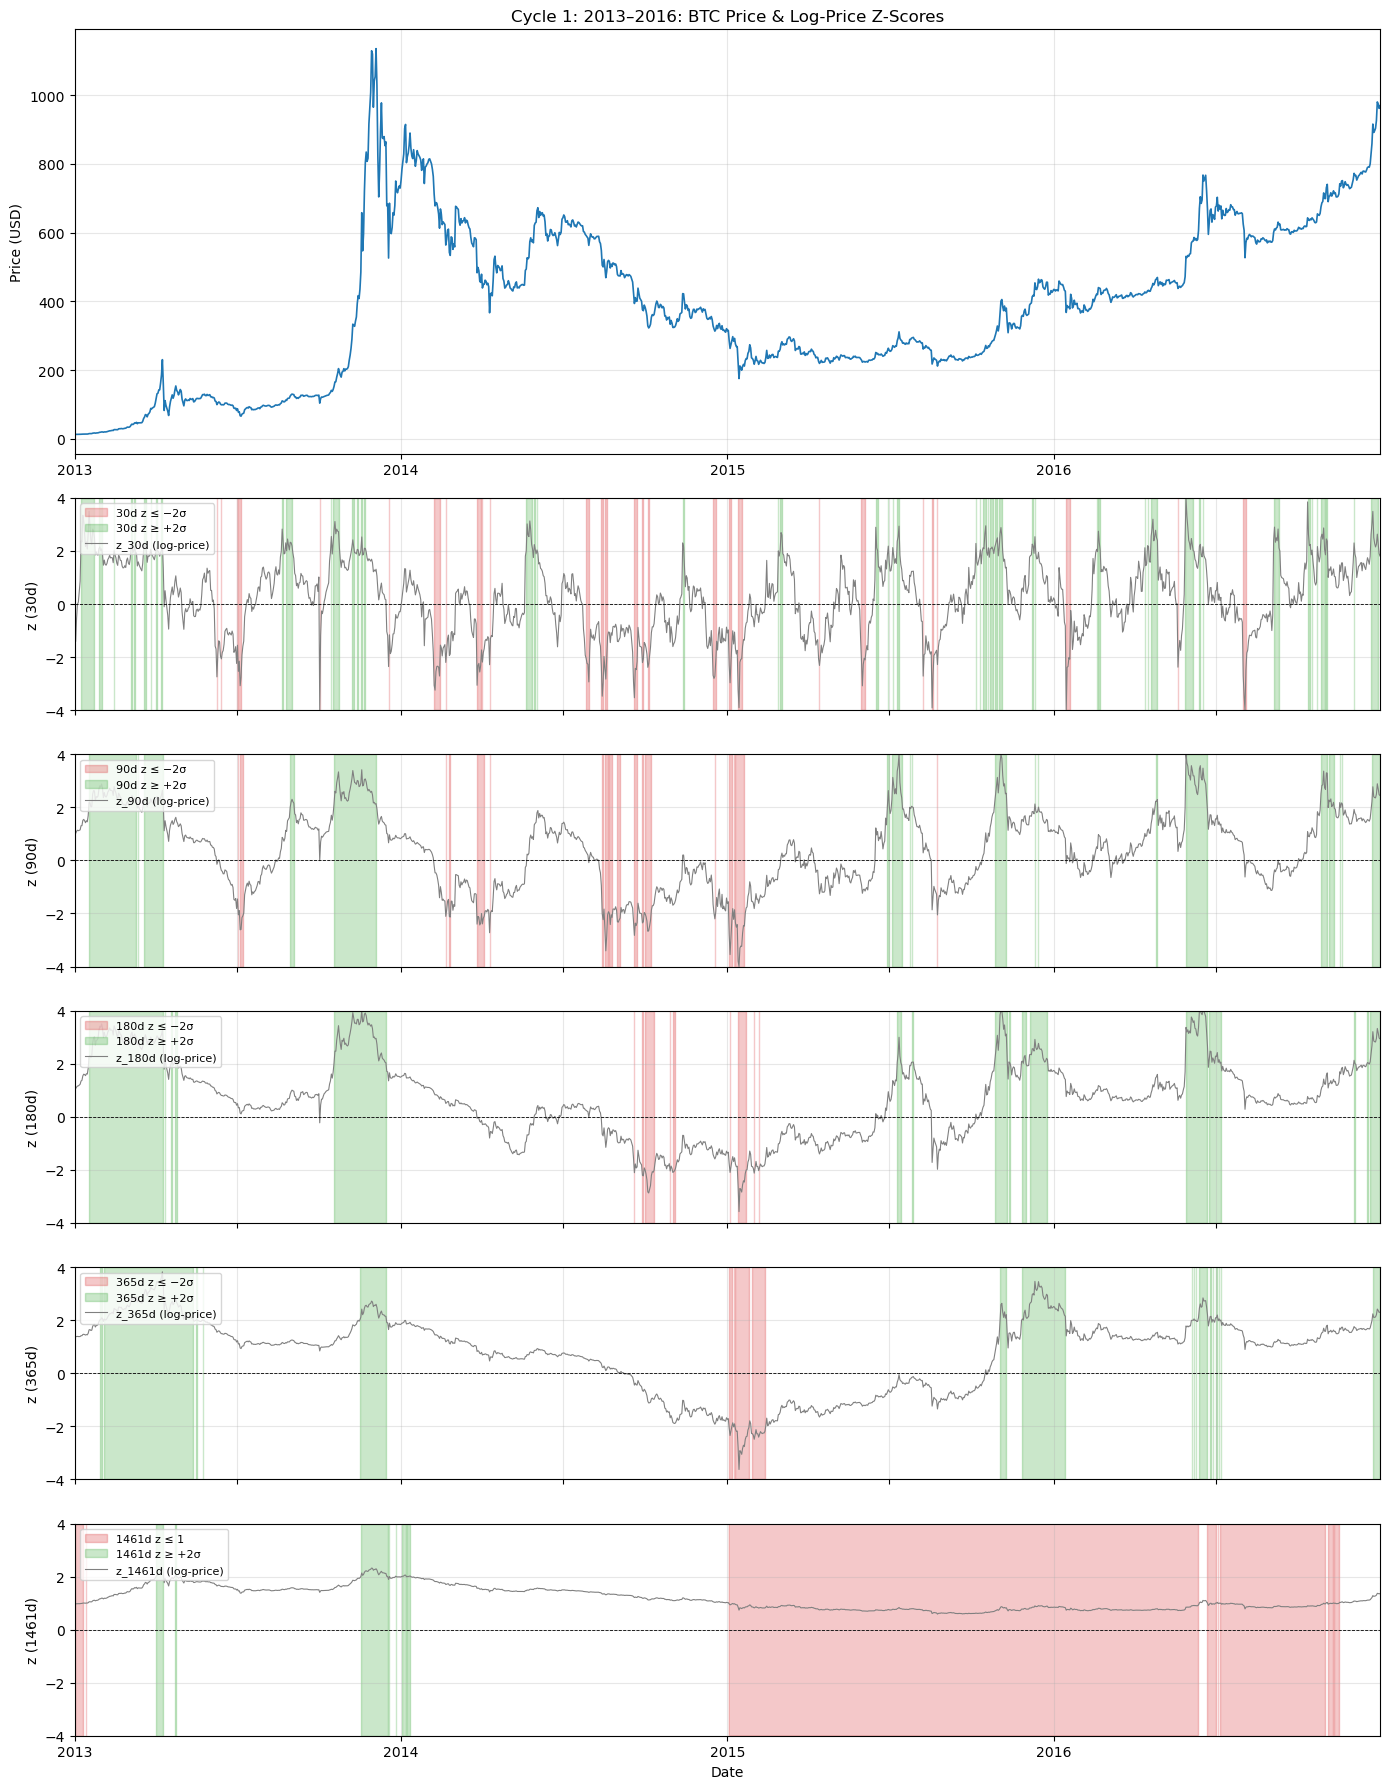
- **Cycle 2 (2017–2020)**  
  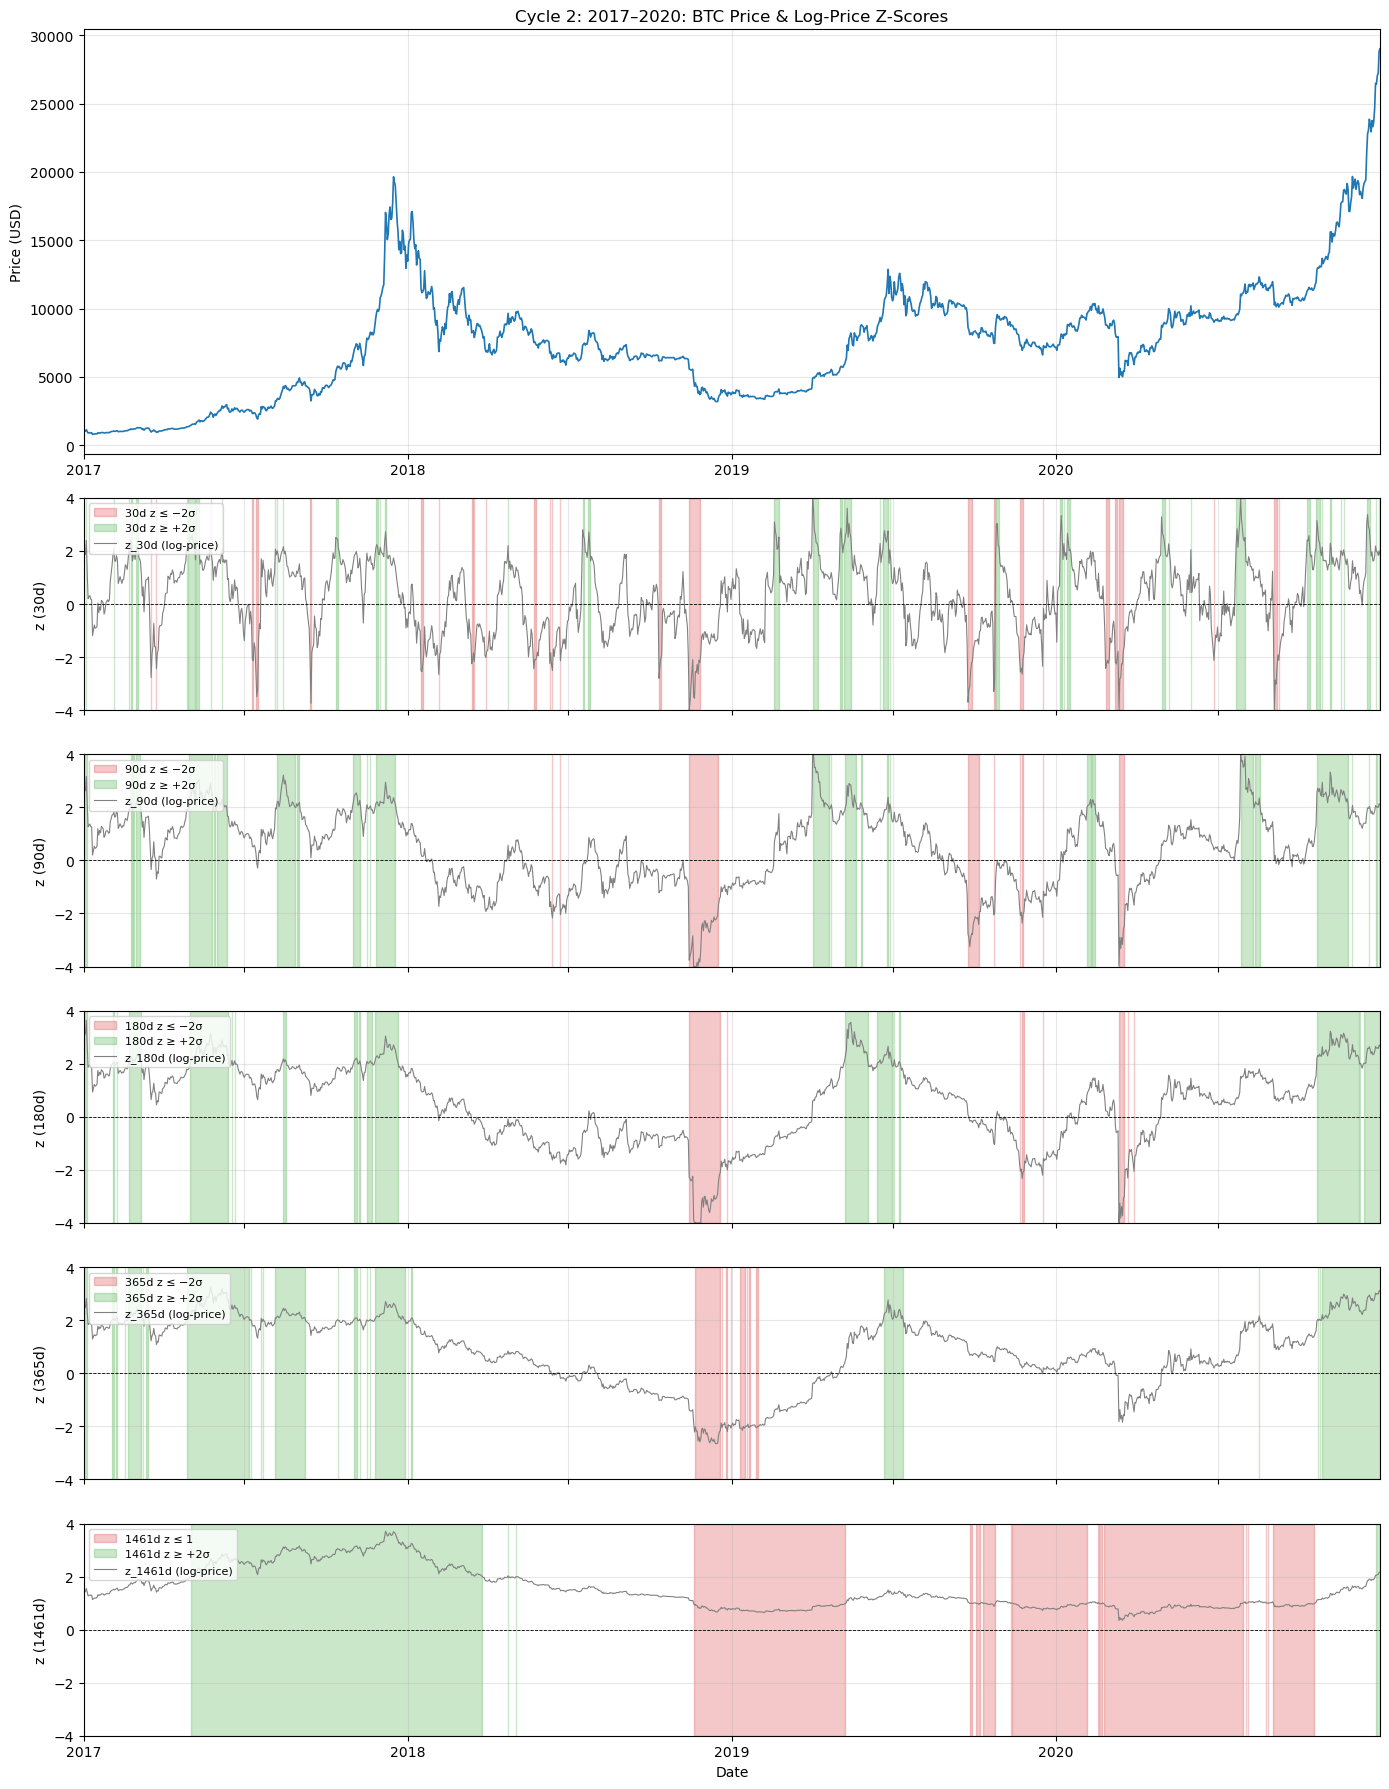
- **Cycle 3 (2021–2024)**  
  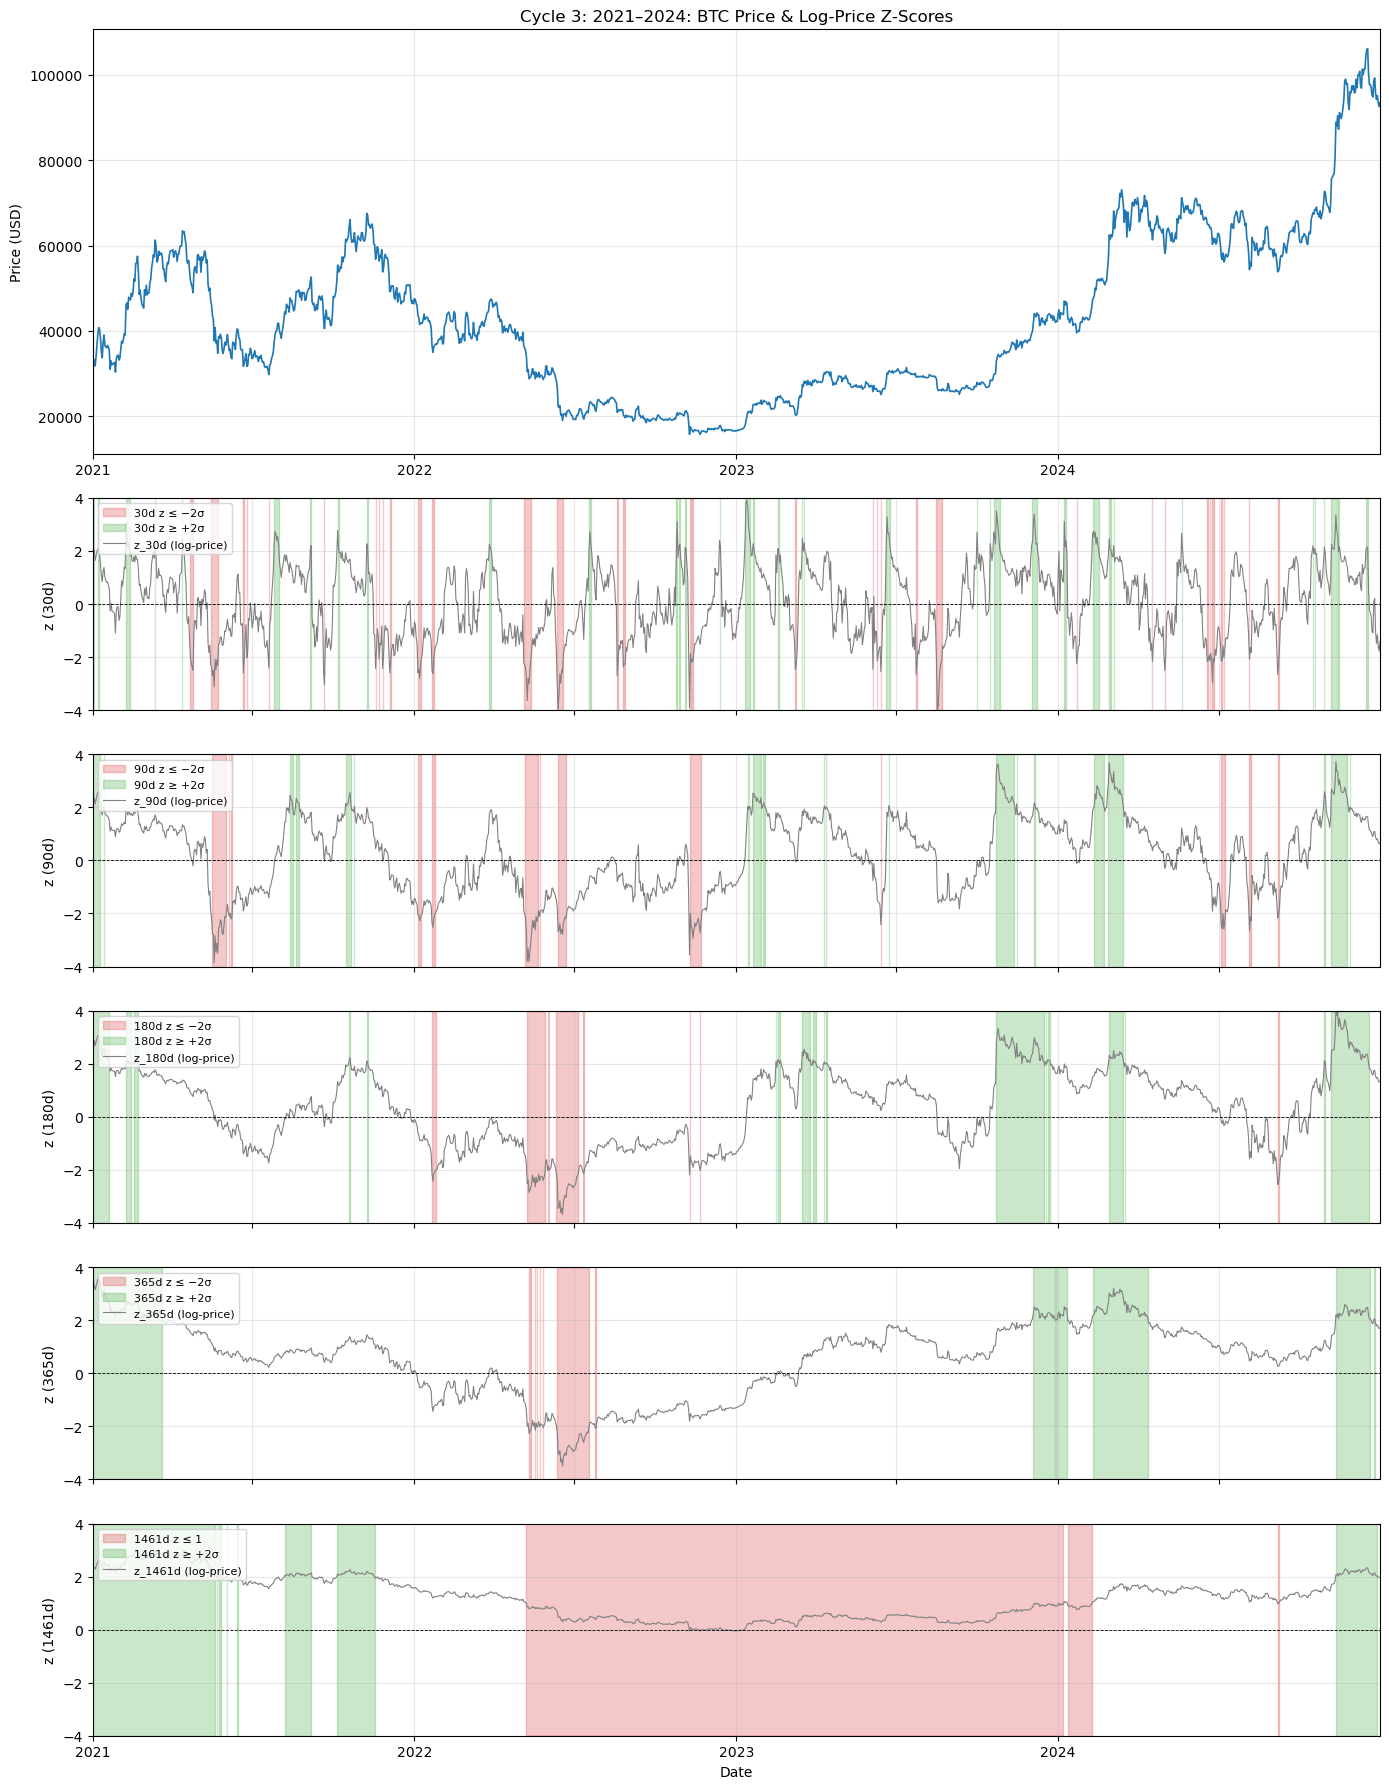

**Key observations:**

- **Short-Term Dips & Peaks (30d, 90d)**
  - **Red shading (Z ≤ –2σ)** marks rapid oversold conditions ideal tactical dip-buying opportunities.
  - **Green shading (Z ≥ +2σ)** highlights brief overbought spikes signals to trim exposure or pause buys.
  - These windows capture sharp moves that often correct within weeks.

- **Intermediate Trends (180d, 365d)**
  - Reveal sustained undervaluation or frothiness over months.
  - **180-day Z ≤ –2σ** often aligns with protracted bear phases; **365-day Z ≥ +2σ** coincides with mature bull tops.
  - Useful for aligning medium-term allocation posture.

- **4-Year Cycle Phase (1461d)**
  - The longest window smooths out short-term noise and maps directly to Bitcoin’s halving cycles.
  - **Z ≤ +1** (unshaded or lightly shaded) signals the “accumulation” or “recovery” phase—favorable for front-loaded budgets.
  - **Z ≥ +2σ** (deep red) flags the “euphoria” or “distribution” phase—ideal for capital preservation or heavy back-loading.
  - This background shading shows exactly which leg of the 4-year cycle the market is in today.

By combining these time horizons, log-price Z-scores provide a unified, statistically rigorous framework for:

1. **Spotting immediate tactical entry/exit points** (30d, 90d),  
2. **Gauging broader trend strength** (180d, 365d),  
3. **Determining strategic cycle posture** (1461d).  

---

## 6. Demonstrating the Power of Log-Price Z-Scores

Below are two key charts both based **solely** on rolling log-price Z-scores—that expose Bitcoin’s multi-year cycle structure and market regimes with crystal-clear precision.

### 6.1 4-Year Cycle Phase Heatmap  
The 1,461-day Z-score was computed on the **first trading day** of each month and bin it into four phases:  
- **Deep Dip:** Z < 0.7 (blue)  
- **Neutral:** 0.7 ≤ Z < 1.0 (light-blue)  
- **Caution:** 1.0 ≤ Z < 2.0 (orange)  
- **Euphoria:** Z ≥ 2.0 (red)  

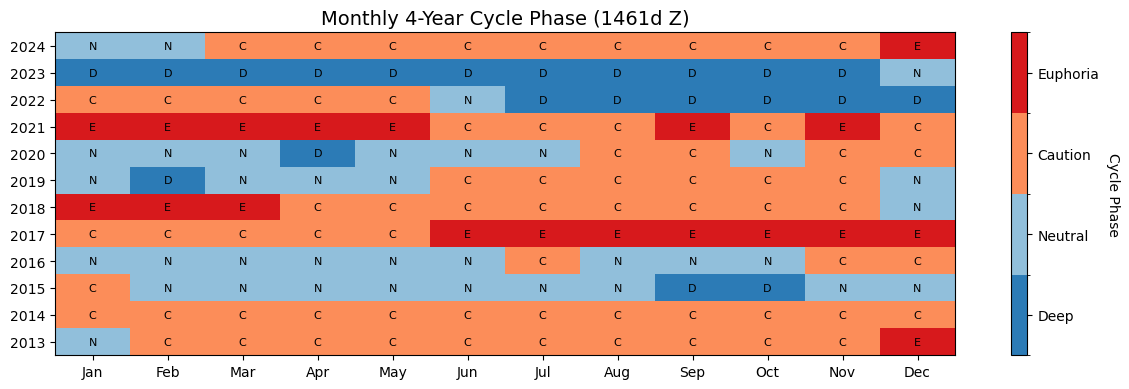

- **Deep Dip (blue)** months align with extended bear markets (2015, 2018–19, 2022).  
- **Euphoria (red)** months pinpoint cycle tops (late 2013, late 2017, 2021, late 2024).  
- Using the first-of-month Z-score ensures each row is anchored to its own cycle baseline, creating a clean, seasonal map of the four-year halving cycle.


### 6.2 Regime Clustering Across Cycles  
K-Means on the five log-price Z-scores (30d, 90d, 180d, 365d, 1 461d) yields four intuitive regimes—Accumulation, Bull, Bear, Transition that consistently map to major market phases:

**2013–2016** 
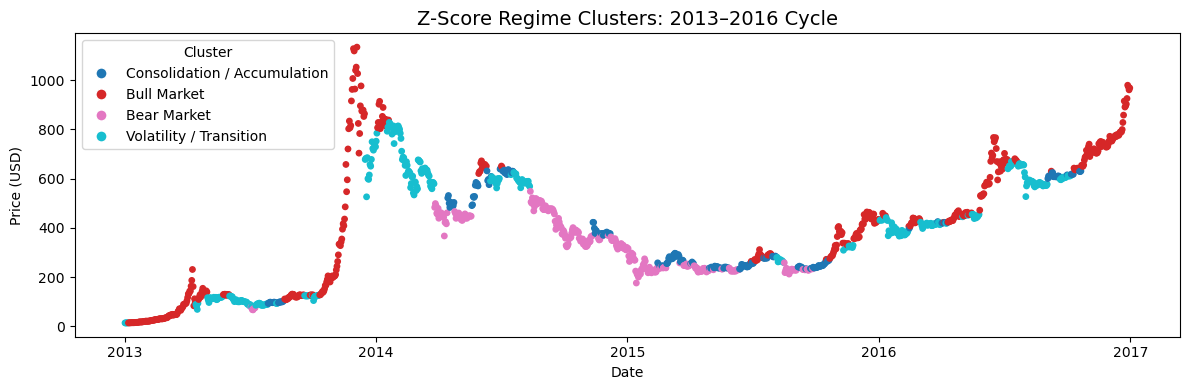
**2017–2020**
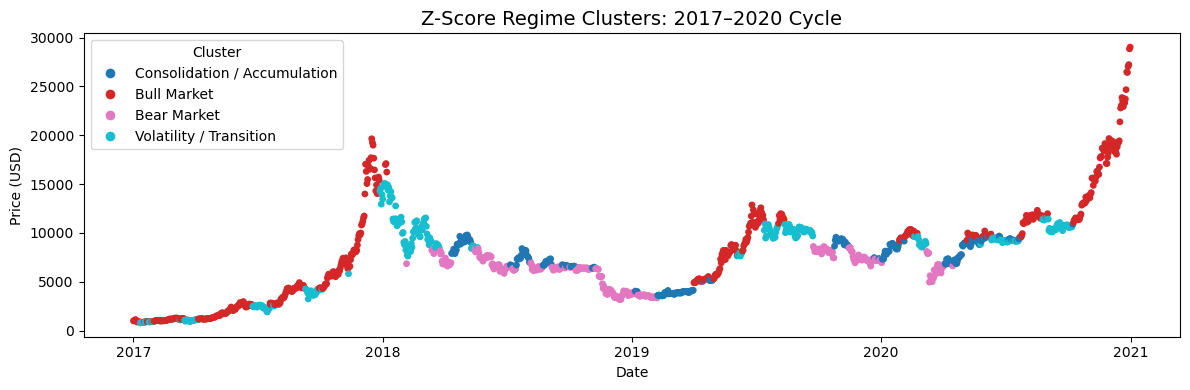
**2021–2024**
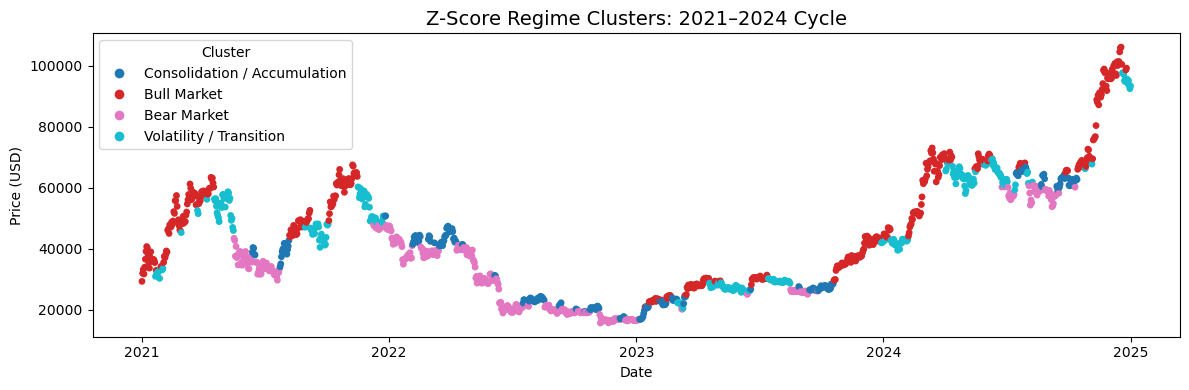

- **Accumulation (blue)** appears at cycle lows, marking disciplined buy zones.  
- **Bull Market (red)** tracks explosive up-trends.  
- **Bear Market (pink)** highlights corrective drawdowns.  
- **Transition (teal)** captures periods of heightened volatility and regime shifts.

> **Key insight:** These two visualizations built **only** on log-price Z-scores surface every major market regime and cycle phase with unmatched clarity. No additional on-chain, network or valuation metrics were needed to reveal these robust patterns.  

For full technical details and code behind these visualizations, see the companion notebook section 3 in ([supplementary_technical.ipynb](supplementary_technical.ipynb)).



## 7. Summary

The Exploratory Data Analysis to date has revealed a clear, unified framework for dynamic Bitcoin accumulation:

1. **Dataset Scope**  
   - Over a decade of Bitcoin market and network data provides hundreds of raw features.  
   - Early exploration confirmed that many indicators (on-chain metrics, miner health, valuation ratios) either lag price or become unreliable as the market evolves.

2. **Core Signal Identification**  
   - **Multi-window log-price Z-scores** (30d, 90d, 180d, 365d, 1461d) consistently highlight tactical dips, medium-term trends, and the current 4-year cycle phase.  

3. **Cycle-Aware Baseline Allocation**  
   - The shape of the annual budget (front-loaded, uniform, back-loaded) to be chosen based on the long-term Z-score at January 1.  
   - This establishes a risk-sensitive foundation that aligns capital deployment with the market’s phase.

4. **Signal-Driven Modulation**  
   - Daily purchases will then be scaled above or below the baseline according to short- and medium-term Z-scores and momentum readings.  
   - Any deviation triggers a proportional rescaling of remaining allocations to preserve the total annual budget.